<a href="https://colab.research.google.com/github/Gvitagliano/IF/blob/main/IF_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.12154534821500933 0.24376770173536869


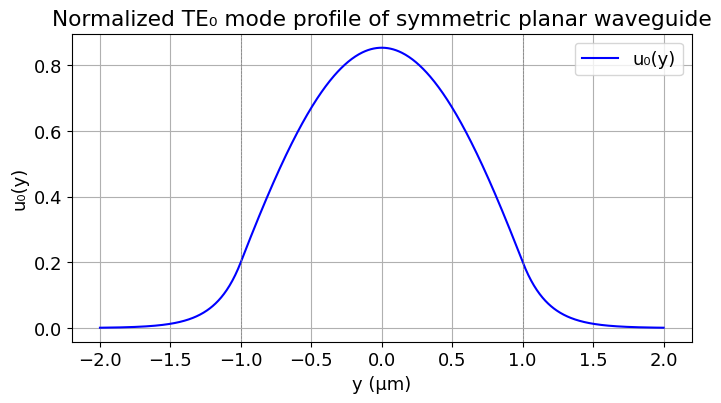

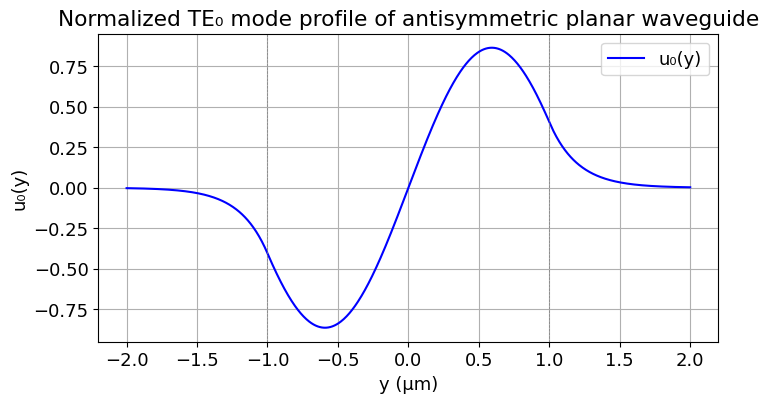

In [42]:
import numpy as np
from scipy.optimize import newton
import matplotlib.pyplot as plt

#Calculation of alpha1 and alpha0
def LHS(a,m):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  LHS = np.tan(n1*(np.pi/l0)*d*np.sin(a)-(np.pi*m/2))
  return LHS

def RHS(a):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  thc = np.arcsin(n2/n1)
  RHS = ((np.sin((np.pi/2)-thc)**2)/np.sin(a)**2)-1
  return np.sqrt(np.maximum(RHS,0))

def func0(a): return LHS(a,0)-RHS(a)
def func1(a): return LHS(a,1)-RHS(a)

a = np.linspace(0.10,0.5,10000)
alpha0 = newton(func0,x0=0.09)
alpha1 = newton(func1,x0=0.09)

print(alpha0,alpha1)

def um0(y):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  k0 = (2*np.pi/l0)
  ky = k0*n1*np.sin(alpha0)
  gamma = np.sqrt((k0*n1*np.cos(alpha0))**2-(k0*n2)**2)
  B0 = np.exp(-gamma)/np.cos(ky*d/2)
  A = (2*ky*gamma)/(gamma*B0*(d*ky+np.sin(ky*d))+2*ky*np.exp(-gamma*d))
  B = B0*A
  return B*np.cos(ky*y)

def um1(y):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  k0 = (2*np.pi/l0)
  ky = k0*n1*np.sin(alpha1)
  gamma = np.sqrt((k0*n1*np.cos(alpha1))**2-(k0*n2)**2)
  Bp0 = np.exp(-gamma)/np.sin(ky*d/2)
  A = (2*ky*gamma)/(gamma*Bp0*(d*ky-np.sin(ky*d))+2*ky*np.exp(-gamma*d))
  Bp = Bp0*A
  return Bp*np.sin(ky*y)

def umcR0(y):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  k0 = (2*np.pi/l0)
  ky = (2*np.pi/l0)*n1*np.sin(alpha0)
  gamma = np.sqrt((k0*n1*np.cos(alpha0))**2-(k0*n2)**2)
  B0 = np.exp(-gamma)/np.cos(ky*d/2)
  A = (2*ky*gamma)/(gamma*B0*(d*ky+np.sin(ky*d))+2*ky*np.exp(-gamma*d))
  return A*np.exp(-gamma*y)

def umcL0(y):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  k0 = (2*np.pi/l0)
  ky = (2*np.pi/l0)*n1*np.sin(alpha0)
  gamma = np.sqrt((k0*n1*np.cos(alpha0))**2-(k0*n2)**2)
  B0 = np.exp(-gamma)/np.cos(ky*d/2)
  A = (2*ky*gamma)/(gamma*B0*(d*ky+np.sin(ky*d))+2*ky*np.exp(-gamma*d))
  return A*np.exp(gamma*y)

def umcR1(y):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  k0 = (2*np.pi/l0)
  ky = k0*n1*np.sin(alpha1)
  gamma = np.sqrt((k0*n1*np.cos(alpha1))**2-(k0*n2)**2)
  Bp0 = np.exp(-gamma)/np.sin(ky*d/2)
  A = (2*ky*gamma)/(gamma*Bp0*(d*ky-np.sin(ky*d))+2*ky*np.exp(-gamma*d))
  Bp = Bp0*A
  return A*np.exp(-gamma*y)

def umcL1(y):
  n1 = 1.4
  n2 = 1.2
  d = 2
  l0 = 0.8
  k0 = (2*np.pi/l0)
  ky = k0*n1*np.sin(alpha1)
  gamma = np.sqrt((k0*n1*np.cos(alpha1))**2-(k0*n2)**2)
  Bp0 = np.exp(-gamma)/np.sin(ky*d/2)
  A = (2*ky*gamma)/(gamma*Bp0*(d*ky-np.sin(ky*d))+2*ky*np.exp(-gamma*d))
  Bp = Bp0*A
  return -A*np.exp(gamma*y)

# Define y ranges
y_left = np.linspace(-2, -1, 200, endpoint=False)
y_core = np.linspace(-1, 1, 400)
y_right = np.linspace(1, 2, 200, endpoint=True)

# Evaluate each segment
uL0 = umcL0(y_left)
u0 = um0(y_core)
uR0 = umcR0(y_right)

# Combine for plotting
y_full0 = np.concatenate([y_left, y_core, y_right])
u_full0 = np.concatenate([uL0, u0, uR0])

# Evaluate each segment
uL1 = umcL1(y_left)
u1 = um1(y_core)
uR1 = umcR1(y_right)

# Combine for plotting
y_full1 = np.concatenate([y_left, y_core, y_right])
u_full1 = np.concatenate([uL1, u1, uR1])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(y_full0, u_full0, label='u₀(y)', color='blue')
plt.axvline(-1, color='gray', linestyle='--', lw=0.5)
plt.axvline(1, color='gray', linestyle='--', lw=0.5)
plt.title("Normalized TE₀ mode profile of symmetric planar waveguide")
plt.xlabel("y (µm)")
plt.ylabel("u₀(y)")
plt.grid(True)
plt.legend()
plt.show()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(y_full1, u_full1, label='u₀(y)', color='blue')
plt.axvline(-1, color='gray', linestyle='--', lw=0.5)
plt.axvline(1, color='gray', linestyle='--', lw=0.5)
plt.title("Normalized TE₀ mode profile of antisymmetric planar waveguide")
plt.xlabel("y (µm)")
plt.ylabel("u₀(y)")
plt.grid(True)
plt.legend()
plt.show()